# Unsupervised learning with KNN

## EDA & Data Preprocessing

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly as px

In [2]:
df = pd.read_csv("mushrooms.csv")
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [3]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Dividing data into predictors X, and labels y for our unsupervised learning algorithm, because the "Class" column has our labels (If the mushroom is poisonous or not).

In [4]:
X = df.drop(['class'], axis=1)
y = df['class']

In [5]:
for attribute in X.columns:
    print('\n', attribute)
    print(X[attribute].value_counts())


 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

 bruises
f    4748
t    3376
Name: bruises, dtype: int64

 odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

 gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

 gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

 gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

 gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

 stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

 stalk-root
b    3776
?    2480
e    1120
c     556
r  

From this we can find out that the veil-type variable only has the value p, which would mean that every mushroom has it. Since that is the case, the column is useless and we can drop it.

In [6]:
X.drop(['veil-type'], axis=1, inplace=True)

Using Binary Encoding for variables that only hold 2 possible values, one-hot encoding for variables that hold more.

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if len(X[col].value_counts()) == 2:
        X[col] = le.fit_transform(X[col])

In [8]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,1,p,1,0,1,k,0,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,1,a,1,0,0,k,0,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,1,l,1,0,0,n,0,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,1,p,1,0,1,n,0,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,0,n,1,1,0,k,1,...,s,s,w,w,w,o,e,n,a,g


In [9]:
X = pd.get_dummies(X)

In [10]:
X.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=2)


In [13]:
kmeans.fit(X_train)

KMeans(n_clusters=2)

In [14]:
clusters = kmeans.predict(X)

In [15]:
cluster_df = pd.DataFrame()

cluster_df['cluster'] = clusters
cluster_df['class'] = y

In [16]:
kmeans_pred = kmeans.predict(X_test)

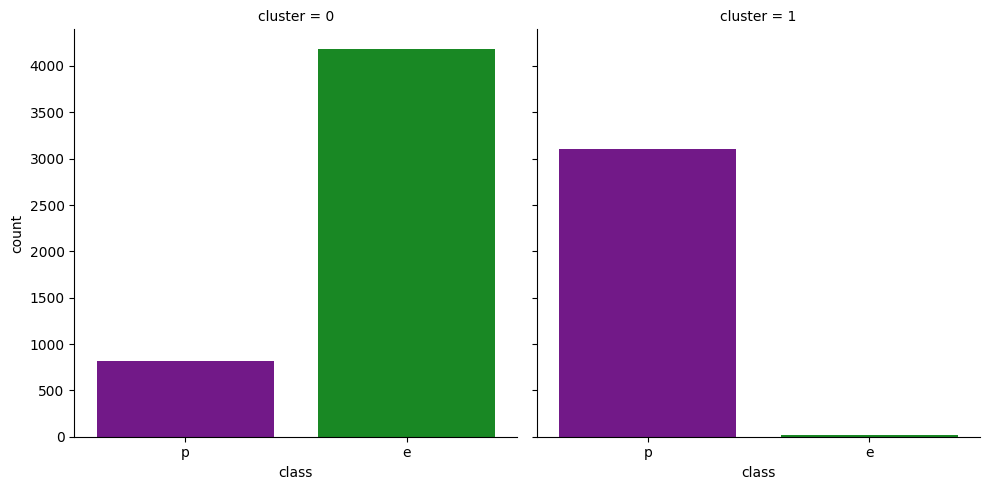

In [25]:
sns.catplot(col='cluster', y=None, x='class', data=cluster_df, kind='count', order=['p','e'], palette=(["#7d069b","#069b15"]))


In [18]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

In [20]:
if accuracy_score(kmeans_pred, y_test, normalize=False) < accuracy_score(kmeans_pred_2, y_test, normalize=False):
    kmeans_pred = kmeans_pred_2

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['e' 'p']. Make sure that the predictions provided by the classifier coincides with the true labels.